In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
if sys.path[0] != '../py_utils':
    sys.path.insert(0,'../py_utils')

import utils
import file_utils    
    

print("Seaborn version: ", sns.__version__)

Seaborn version:  0.9.0


In [2]:
summary_team_file = '../Data/sr_summaries_kaggle_id_no_opp_2018.csv'
team_meta_data_file = '../Data/D1_teams.csv'
tournament_data_file = '../Data/tournament_results_2018.csv'

# earliest season data starts in 2002 corresponding to tournament season date of 2003
start_tournament = 2003
stop_tournament = 2018

In [3]:
summary_data = file_utils.read_summary_team_data(summary_team_file)
teams = file_utils.read_team_meta_data(team_meta_data_file)
summary_data.head()

,season,school,team_id,games,srs,sos,win_pct,pts_avg,opp_pts_avg,fg_pct,ft_pct,poss_avg,off_rebs_avg,def_rebs_avg,to_avg,steal_avg,off_rating,ft_att_avg
0,2000,Air Force,aa7af640-5762-4686-9181-39f7b8a8186e,29,-3.57,1.99,0.276,57,63,0.435,0.697,63.020690,6.0,16.0,13,7,90.446487,16
1,2000,Akron,56fe0ab2-e4f0-47b9-8726-9ce23ebcde20,28,-3.09,1.67,0.429,67,72,0.452,0.725,73.857143,9.0,20.0,15,5,90.715667,23
2,2000,Alabama,c2104cdc-c83d-40d2-a3cd-df986e29f5d3,36,14.02,6.27,0.694,76,68,0.433,0.698,86.200000,16.0,26.0,15,7,88.167053,24
3,2000,Alabama A&M,949c3398-85e4-4c63-ba71-9a82e06ddea4,28,-13.46,-11.79,0.607,73,74,0.391,0.626,94.264286,17.0,22.0,16,12,77.441843,23
4,2000,Alabama State,267d417a-8f85-4c87-a15a-068c089a74c6,31,-8.86,-13.61,0.710,68,63,0.441,0.658,80.690323,12.0,25.0,16,8,84.272807,22


In [4]:
game_data = file_utils.read_tournament_results(tournament_data_file,start_tournament)
game_data.describe()

,season,round,win_seed,win_pts,lose_seed,lose_pts
count,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000
mean,2010.591603,44.274809,5.151718,75.154580,8.818702,63.745229
std,4.611062,22.442644,3.994370,10.758749,4.627433,10.353124
min,2003.000000,2.000000,1.000000,47.000000,1.000000,29.000000
25%,2007.000000,32.000000,2.000000,68.000000,5.000000,57.000000
50%,2011.000000,64.000000,4.000000,75.000000,9.000000,63.000000
75%,2015.000000,64.000000,8.000000,82.000000,13.000000,71.000000
max,2018.000000,68.000000,16.000000,121.000000,16.000000,105.000000


#### How many tournament games per year?

In [5]:
number_years = game_data.season.max() - game_data.season.min() + 1
game_data['season'] = game_data['season'].astype('category')

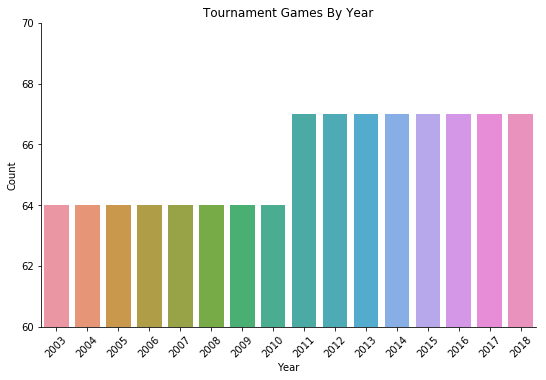

In [6]:
g = sns.catplot('season',kind='count',aspect=1.5,  data=game_data)
g.set_xticklabels(rotation=45).ax.set(ylim=(60, 70))
g.ax.set_title("Tournament Games By Year")
g.ax.set(xlabel='Year', ylabel='Count')
plt.show()

#### Tournament Seed Performance

Finals Seed Winners
   win_seed  count  percent
0         1     10    62.50
1         2      2    12.50
2         3      3    18.75
3         7      1     6.25


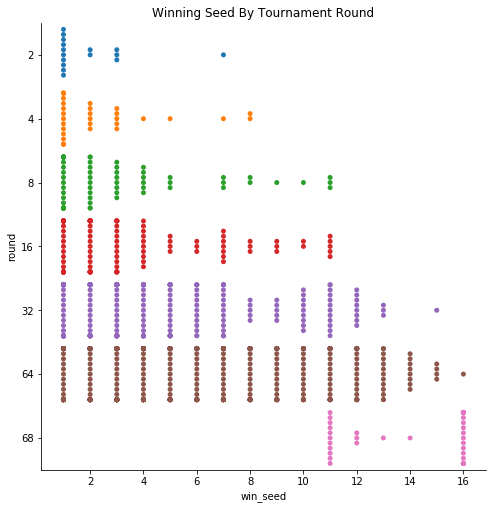

In [7]:
number_seeds = number_years * 4 
result =game_data[game_data['round']==2].groupby(['win_seed']).size()
total = result.sum()
result =result.reset_index(name='count')
result['percent'] =100* result['count']/total
print("Finals Seed Winners")
print(result)

game_data['round'] = game_data['round'].astype('category')
seed_plot = sns.catplot(x='win_seed', y='round',kind='swarm',height=7, aspect=1, orient='h', data=game_data)
seed_plot.ax.set_title('Winning Seed By Tournament Round')
plt.show()

####                       Winning seed per tournament round.

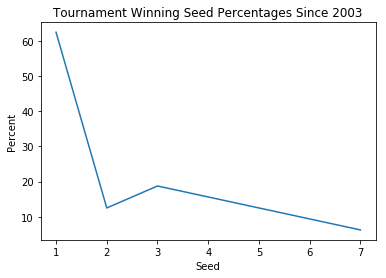

In [8]:
ax= sns.lineplot(x="win_seed", y="percent",data=result)
ax.set(xlabel='Seed', ylabel= 'Percent')
ax.set_title("Tournament Winning Seed Percentages Since 2003")
plt.show()

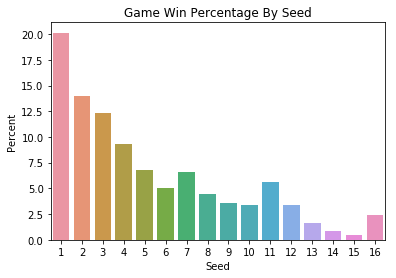

In [9]:
all_winners = game_data.groupby(['win_seed']).size()
g_win =sns.barplot(x=all_winners.index, y=100*all_winners/all_winners.sum(), orient="v")
g_win.set(xlabel='Seed', ylabel='Percent')
g_win.set_title("Game Win Percentage By Seed")
plt.show()

Considering all tournament games including play-ins, since 2003, just over 20% of the games have been won by number one seeds. Over 50% of the games have been won by seeds one through four.


In [10]:
print("Number of games= ", game_data.shape[0])
upsets = game_data[game_data['win_seed'] > game_data['lose_seed']][['season','win_market','lose_market','win_seed','lose_seed']]
print("Number of upsets= ", upsets.shape[0], "Percent upsets= ", 100*upsets.shape[0]/(upsets.shape[0] + game_data.shape[0]))

Number of games=  1048
Number of upsets=  283 Percent upsets=  21.26220886551465


In [11]:
upsets['delta_seed'] = abs(upsets['win_seed'] - upsets['lose_seed'])
#upsets.sort_values(by=['delta_seed'],ascending=False)[['delta_seed','season','win_market','lose_market','win_seed','lose_seed']]

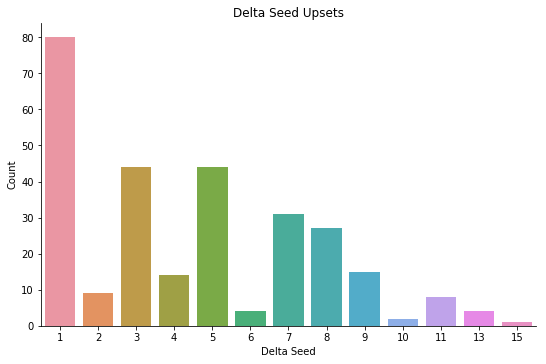

In [12]:
g = sns.catplot('delta_seed',kind='count',aspect=1.5,  data=upsets)
g.ax.set_title("Delta Seed Upsets")
g.ax.set(xlabel='Delta Seed', ylabel='Count')
plt.show()

The plot above depicts the difference in the winning seed and the losing seed when a higher seed upsets a lower seed.
For example, if a 13th seed upsets a 5th seed, the difference(delta) would be 5. 

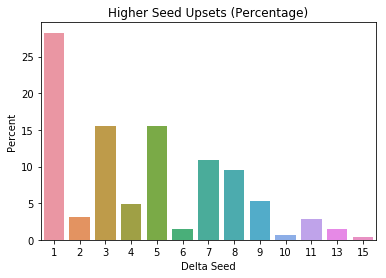

In [13]:
temp = upsets.delta_seed.value_counts().to_frame(name='delta_seed_count').reset_index()
temp['percent'] =  temp.apply(lambda x: 100.0 * x['delta_seed_count']/len(upsets.index), axis=1)
g2 =sns.barplot(x="index", y="percent", data=temp, orient="v")
g2.set(xlabel='Delta Seed', ylabel='Percent')
g2.set_title("Higher Seed Upsets (Percentage)")
plt.show()

Approximately 70% of upsets occur when the difference in seeding is 6 or less.

#### Conference Tournament Performance

In [14]:
game_data = game_data.join(teams,on='win_team_id',how='left')
game_data.rename(columns={'kaggle_team_id':'win_kaggle_team_id','conf_name':'win_conf_name'}, inplace=True)
game_data = game_data.join(teams,on='lose_team_id',how='left')
game_data.rename(columns={'kaggle_team_id':'lose_kaggle_team_id','conf_name':'lose_conf_name'}, inplace=True)


In [15]:
winners = game_data[game_data['round']==2][['season','win_market','win_conf_name']]
winners.sort_values(by=['season'])
winners.groupby(['win_market']).size().reset_index(name='count').sort_values(by=['count'], ascending=False)
win_conf =winners.groupby('win_conf_name').size().reset_index(name='count').sort_values(by=['count'], ascending=False)

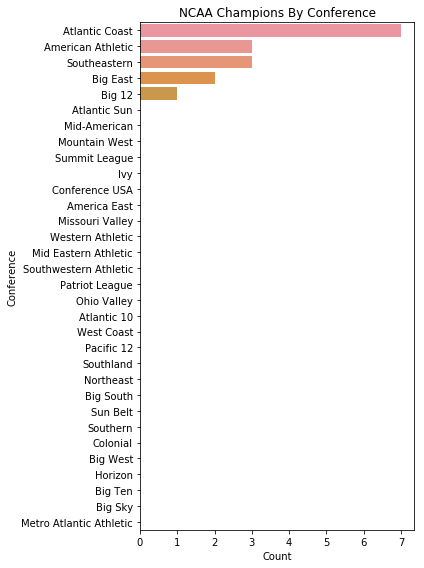

In [16]:
conferences = teams.conf_name.unique()
index = ['Row'+str(i) for i in range(1, len(conferences)+1)]
conf_df = pd.DataFrame(conferences, index=index)
conf_df.columns = ['conf_name']
conf_df
conf_wins = conf_df.merge(win_conf, left_on='conf_name', right_on='win_conf_name', how='left')
conf_wins.drop(columns=['win_conf_name'], inplace=True)
conf_wins['count'].fillna(0, inplace=True)

conf_wins = conf_wins.sort_values(by=['count'],ascending=False).reset_index(drop=True)
plt.figure(figsize=(6,8))
ax = sns.barplot(x="count", y="conf_name",  data=conf_wins)
ax.set(xlabel="Count", ylabel='Conference')
ax.set_title("NCAA Champions By Conference")
plt.tight_layout()
plt.show()

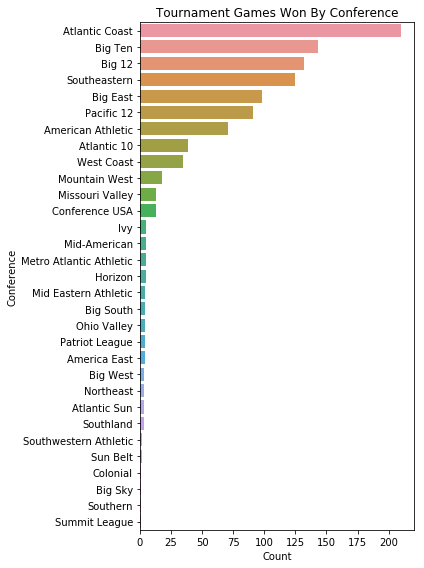

In [17]:
#All tournament wins by conference
games_won_conf = game_data.groupby('win_conf_name').size().reset_index(name='count').sort_values(by=['count'], ascending=False)
plt.figure(figsize=(6,8))
ax = sns.barplot(x="count", y="win_conf_name",  data=games_won_conf)
ax.set(xlabel="Count", ylabel='Conference')
ax.set_title("Tournament Games Won By Conference")
plt.tight_layout()
plt.show()

In [18]:
games_won_conf['percent'] = 100* games_won_conf['count']/games_won_conf['count'].sum()
games_won_conf

,win_conf_name,count,percent
3,Atlantic Coast,210,20.038168
9,Big Ten,143,13.645038
5,Big 12,132,12.595420
24,Southeastern,125,11.927481
6,Big East,98,9.351145
22,Pacific 12,91,8.683206
1,American Athletic,71,6.774809
2,Atlantic 10,39,3.721374
30,West Coast,35,3.339695
19,Mountain West,18,1.717557
